Importing all libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import sklearn
import scipy

In [6]:
df = pd.read_csv("E:\\GIT-HUB-ML\\project_1\\dataset\\creditcard.csv")
print(df.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [7]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
df.shape


(284807, 31)

In [12]:
# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data = df.sample(frac = 0.2, random_state = 1)
print(data.shape)


(56961, 31)


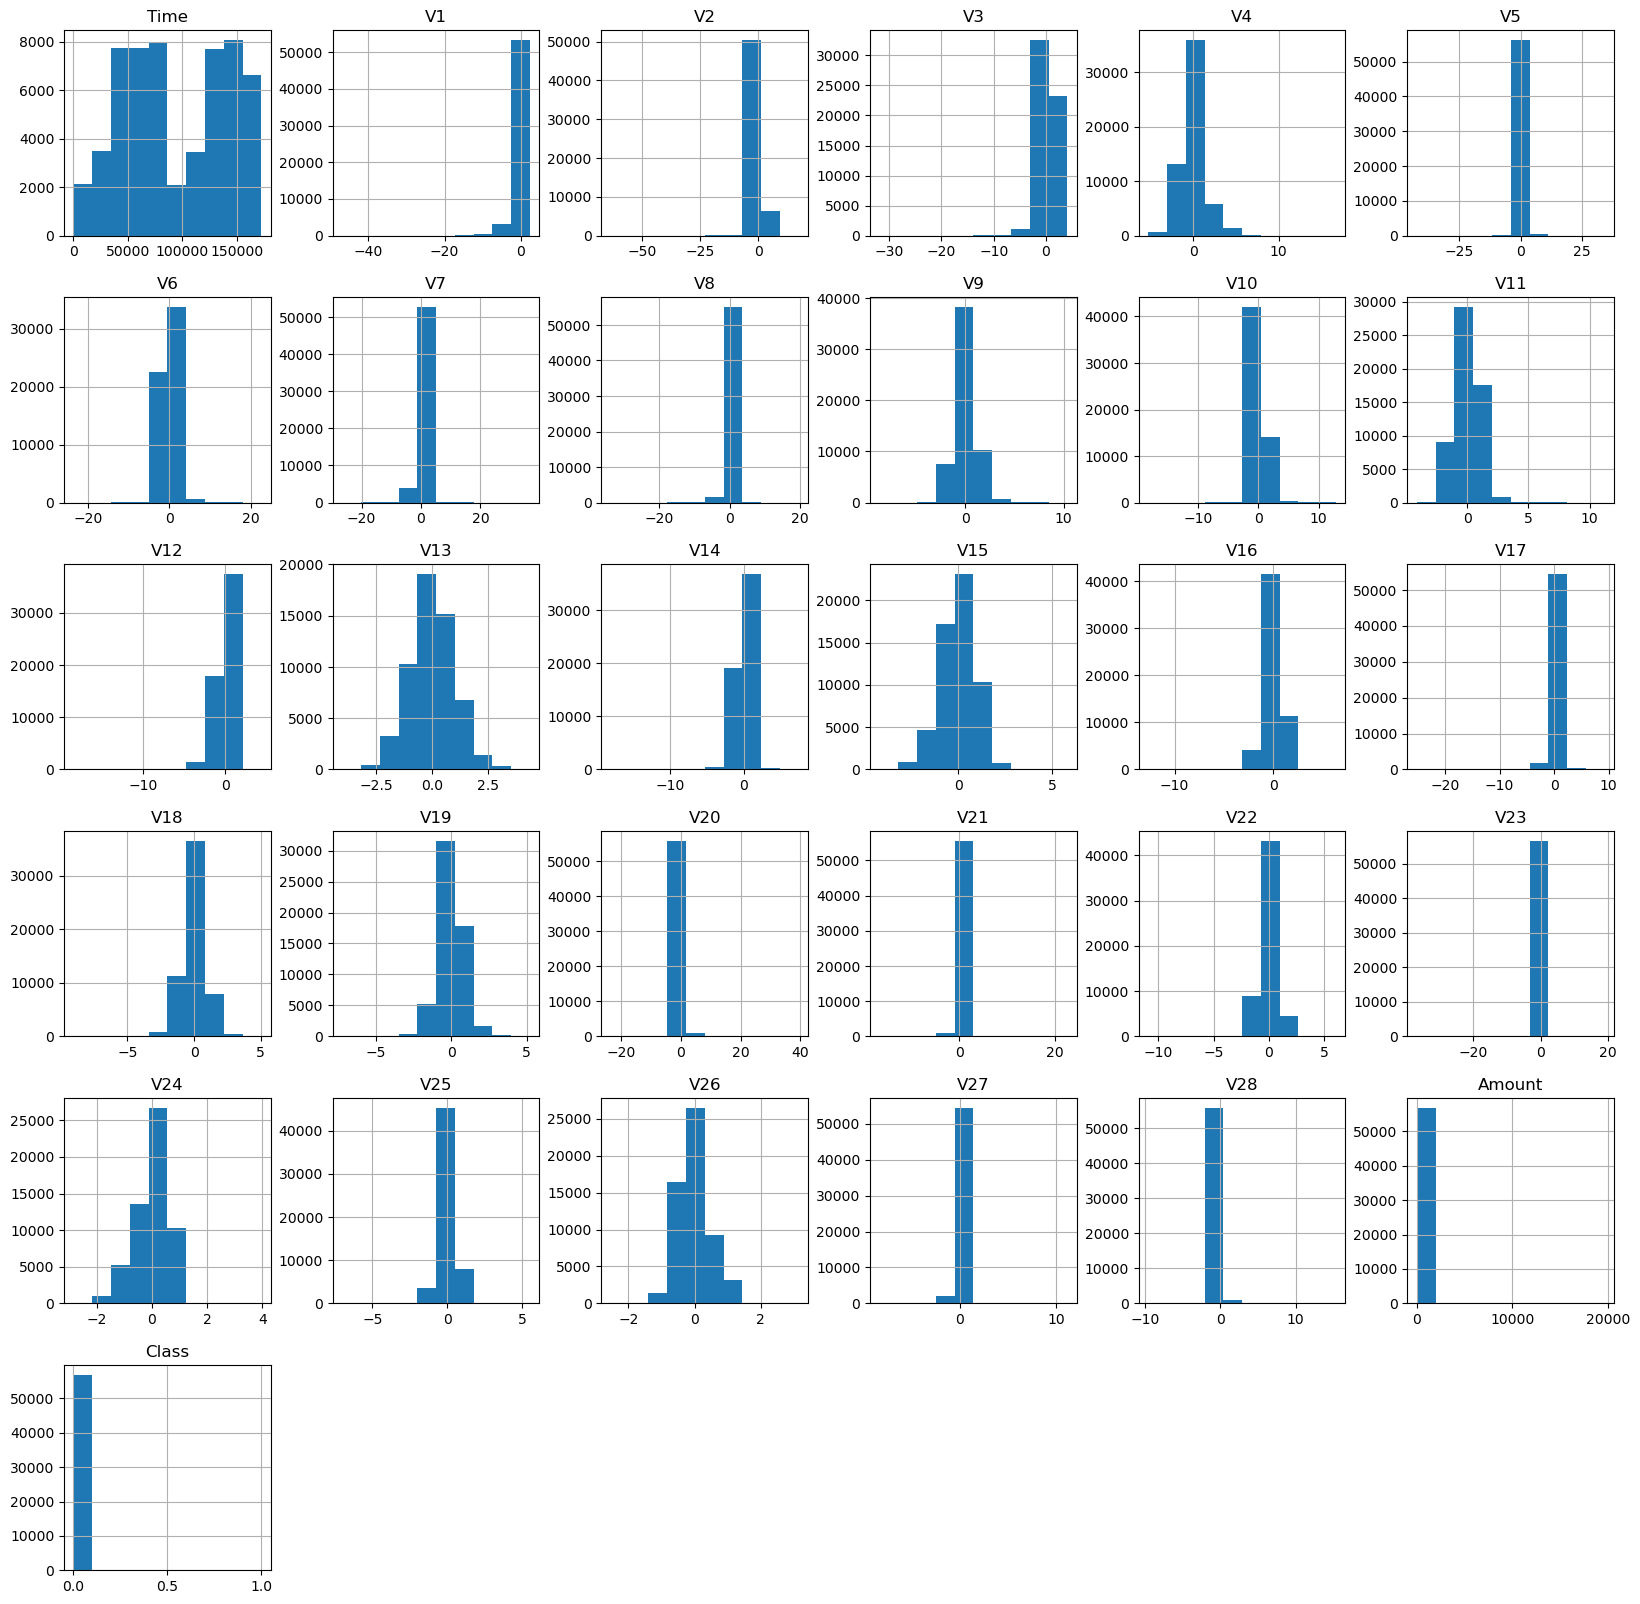

In [13]:
# plot the histogram of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [14]:
# determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0015296972254457222
Fraud Cases: 87
Valid Cases: 56874


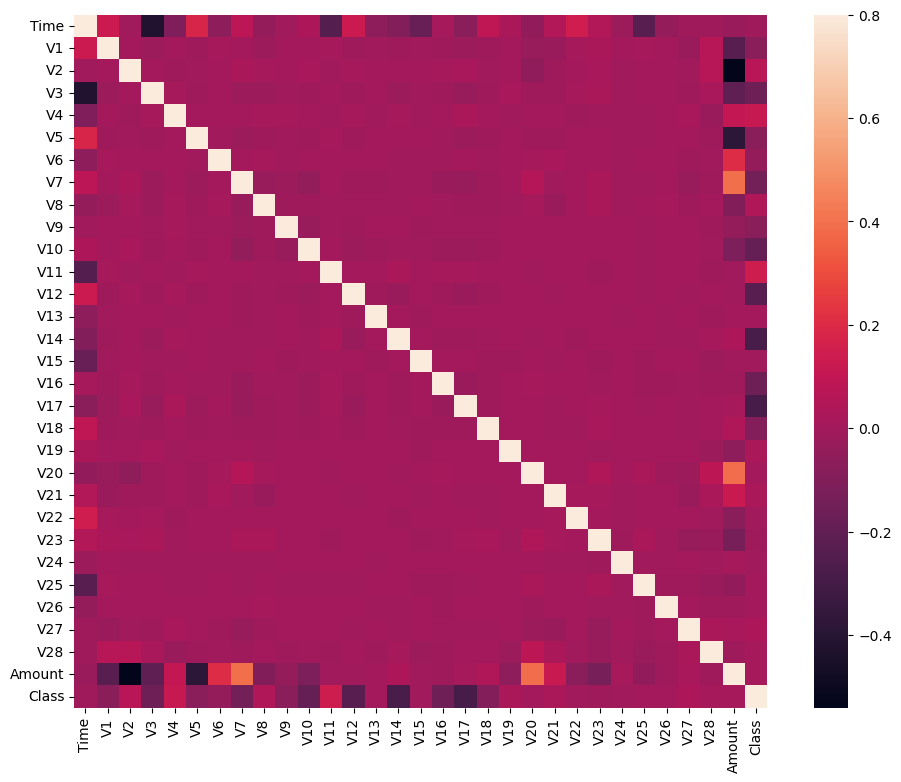

In [15]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Organizing the data


In [16]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = data[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


Applying Algorithms

In [17]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [18]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

Fit the model

In [19]:
import warnings  # Correctly import the warnings module
import os        # Import the os module if you need to use OS functionalities

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
    
    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

c:\Users\vansh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 127
0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor: 173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



ROC Curve and AUC Score

c:\Users\vansh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


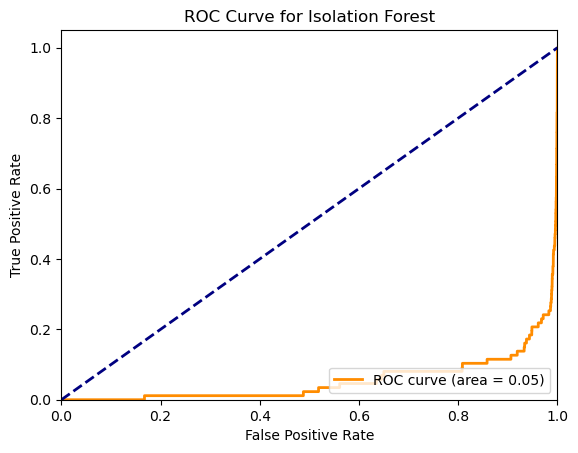

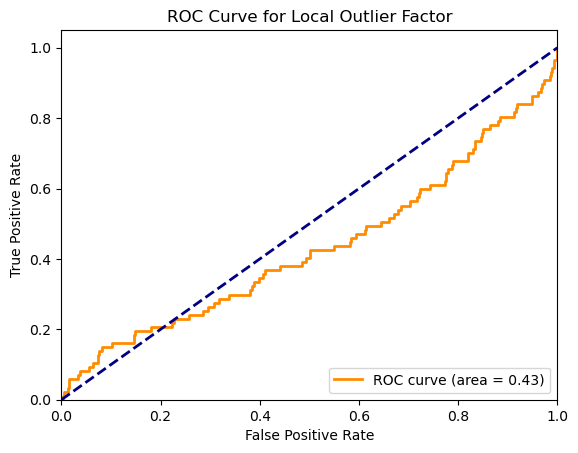

In [20]:
from sklearn.metrics import roc_curve, auc

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fitting and prediction logic remains the same
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape and calculate false positive and true positive rates
    fpr, tpr, thresholds = roc_curve(Y, scores_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {clf_name}')
    plt.legend(loc="lower right")
    plt.show()

Cross Validation

In [21]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

for clf_name, clf in classifiers.items():
    if clf_name == 'Local Outlier Factor':
        continue  # Local Outlier Factor does not have a `fit` method suitable for cross-validation
    
    # Cross-validation
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print(f'{clf_name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')

Isolation Forest Cross-Validation Accuracy: 0.0011 ± 0.0003


class imbalance handling

In [23]:
!pip install imbalanced-learn


     -------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='minority', random_state=state)
X_sm, Y_sm = smote.fit_resample(X, Y)

print(f'Before SMOTE: {Y.value_counts()}')
print(f'After SMOTE: {pd.Series(Y_sm).value_counts()}')

Before SMOTE: 0    56874
1       87
Name: Class, dtype: int64
After SMOTE: 0    56874
1    56874
Name: Class, dtype: int64


Anomaly Detection using Autoencoders

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define autoencoder model
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X, X, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

# Use the reconstruction error to detect fraud
reconstructions = autoencoder.predict(X)
reconstruction_error = np.mean(np.abs(reconstructions - X), axis=1)

# Set a threshold for outliers
threshold = np.percentile(reconstruction_error, 95)

# Predict fraud cases based on threshold
y_pred = (reconstruction_error > threshold).astype(int)
print(f'Accuracy: {accuracy_score(Y, y_pred)}')
print(classification_report(Y, y_pred))

Epoch 1/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 373888896.0000 - val_loss: 372143904.0000
Epoch 2/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 373917536.0000 - val_loss: 372143904.0000
Epoch 3/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 373204160.0000 - val_loss: 372143904.0000
Epoch 4/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 375634656.0000 - val_loss: 372143904.0000
Epoch 5/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 375910240.0000 - val_loss: 372143904.0000
Epoch 6/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 374988832.0000 - val_loss: 372143904.0000
Epoch 7/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 375153472.0000 - val_loss: 372143904.0000
Epoch 8/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 374710688.0000 - val_loss: 372143904.0000
Epoch 9/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 374960800.0000 - val_loss: 372143904.0000
Epoch 10/10
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3

Model Calibration

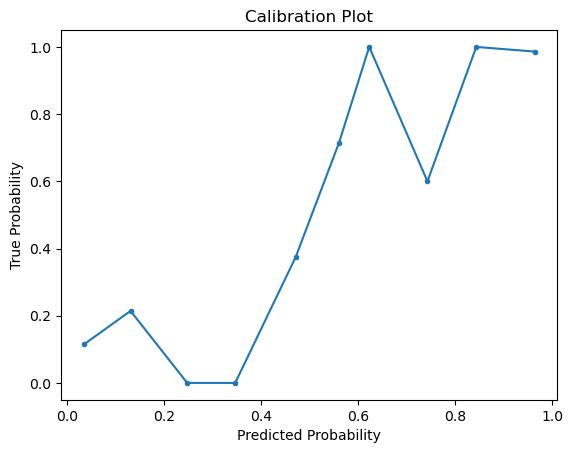

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data (replace this with your actual data)
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Using RandomForest as an example
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Calibrate classifier using isotonic calibration
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic')
calibrated_clf.fit(X_train, Y_train)

# Predict probabilities on the test set
y_prob = calibrated_clf.predict_proba(X_test)[:, 1]

# Check calibration performance
prob_true, prob_pred = calibration_curve(Y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='.')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.show()

Importing machine learning libraries


1> Logistic Regression

Logistic Regression Accuracy: 0.9992509626300574
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



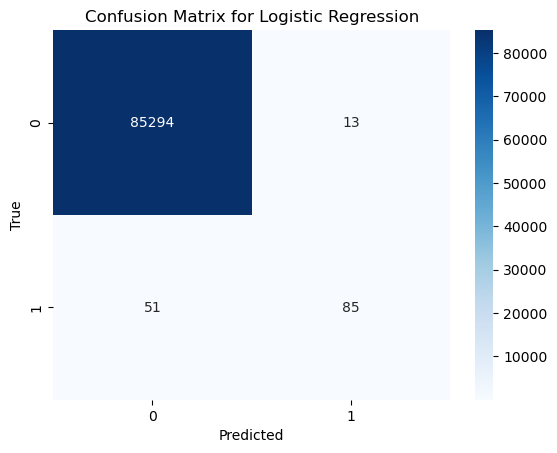

In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the correct path
data = pd.read_csv("E:\\GIT-HUB-ML\\project_1\\dataset\\creditcard.csv")

# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(Y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2> K-Nearest Neighbors Algorithm

KNN Accuracy: 0.9984785178423042
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.04      0.08       136

    accuracy                           1.00     85443
   macro avg       1.00      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443



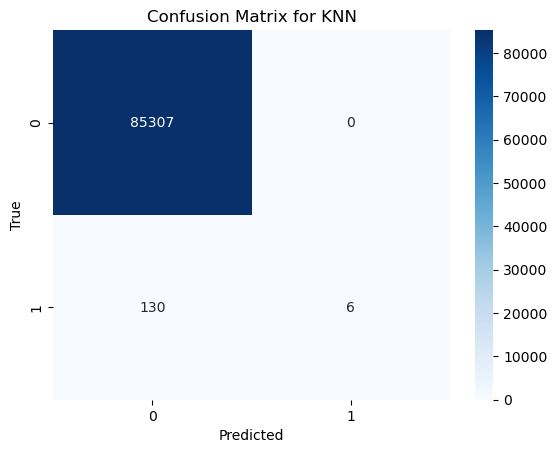

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the correct path
data = pd.read_csv("E:\\GIT-HUB-ML\\project_1\\dataset\\creditcard.csv")


# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

# Make predictions
y_pred = knn_clf.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(Y_test, y_pred))
print("KNN Classification Report:\n", classification_report(Y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3>Gradient Boosting algorithm

Gradient Boosting Accuracy: 0.9985838512224524
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443



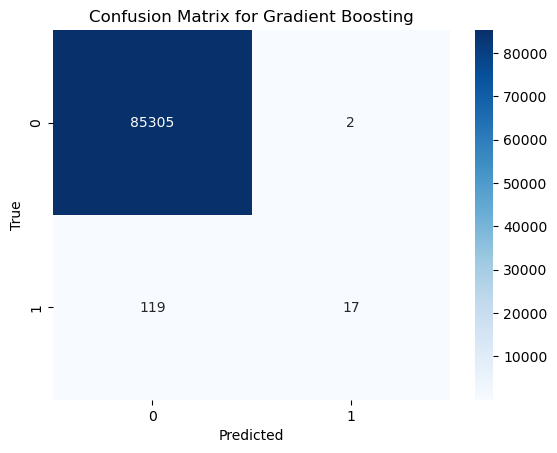

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset 
data = pd.read_csv("E:\\GIT-HUB-ML\\project_1\\dataset\\creditcard.csv")

# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(Y_test, y_pred))
print("Gradient Boosting Classification Report:\n", classification_report(Y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4> comparing all algorithms 


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.04      0.08       136

    accuracy                           1.00     85443
   macro avg       1.00      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.73       136

    accuracy                           1.00     85443
   macro av

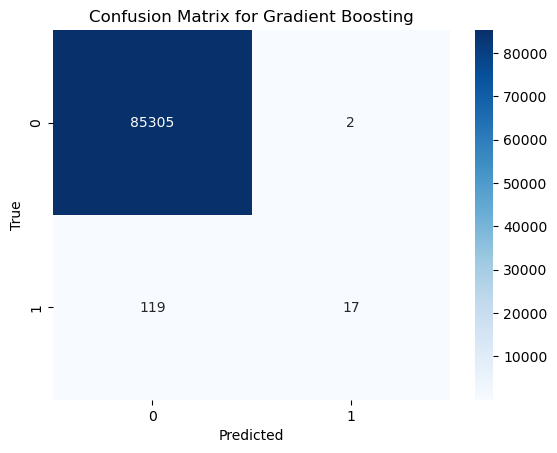


Confusion Matrix for KNN:


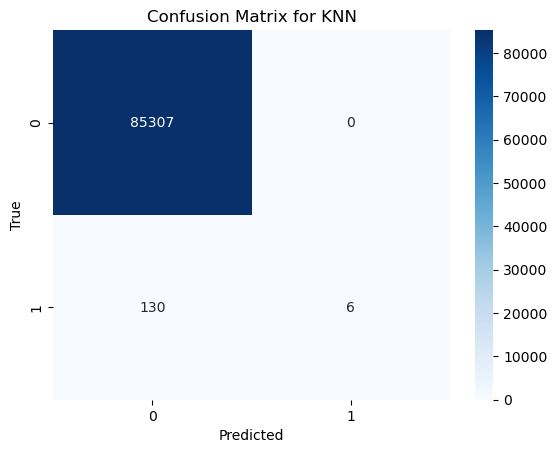


Confusion Matrix for Logistic Regression:


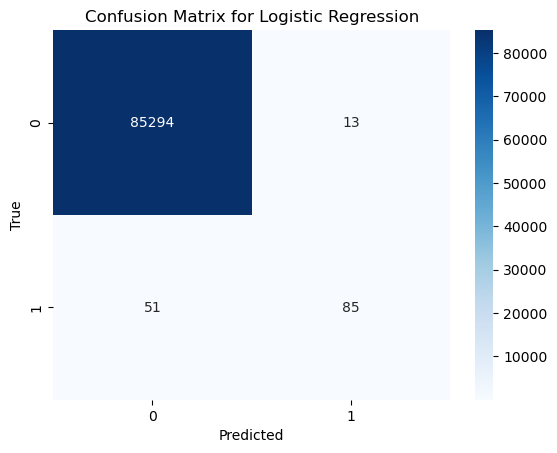

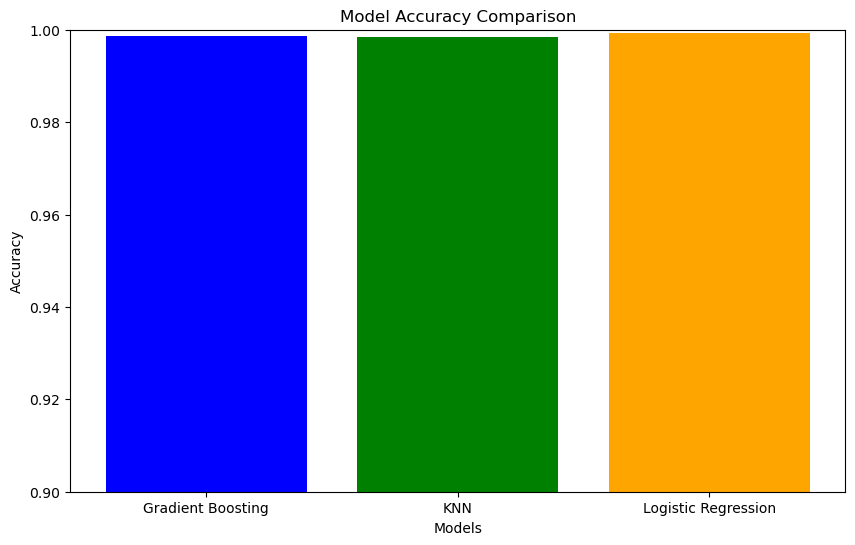

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the correct path
data = pd.read_csv("E:\\GIT-HUB-ML\\project_1\\dataset\\creditcard.csv")

# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Dictionary to store accuracies
accuracies = {}

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracies['Gradient Boosting'] = accuracy_score(Y_test, y_pred_gb)

# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
y_pred_knn = knn_clf.predict(X_test)
accuracies['KNN'] = accuracy_score(Y_test, y_pred_knn)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracies['Logistic Regression'] = accuracy_score(Y_test, y_pred_log_reg)

# Print classification reports and confusion matrices for each model
print("\nGradient Boosting Classification Report:\n", classification_report(Y_test, y_pred_gb))
print("\nKNN Classification Report:\n", classification_report(Y_test, y_pred_knn))
print("\nLogistic Regression Classification Report:\n", classification_report(Y_test, y_pred_log_reg))

# Confusion matrices
print("\nConfusion Matrix for Gradient Boosting:")
sns.heatmap(confusion_matrix(Y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nConfusion Matrix for KNN:")
sns.heatmap(confusion_matrix(Y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nConfusion Matrix for Logistic Regression:")
sns.heatmap(confusion_matrix(Y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot accuracies in a bar chart to compare
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)  # Adjust the y-axis to better see differences if accuracies are close
plt.show()